In [1]:
%load_ext hamilton.plugins.jupyter_magic


/Users/stefankrawczyk/.pyenv/versions/knowledge_retrieval-py39/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


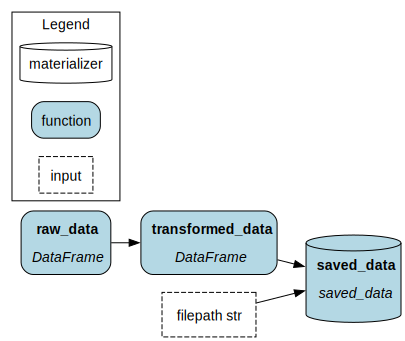

In [2]:
%%cell_to_module simple_etl --display
import pandas as pd
from sklearn import datasets

from hamilton.htypes import DataLoaderMetadata, DataSaverMetadata


def raw_data() -> tuple[pd.DataFrame, DataLoaderMetadata]:
    data = datasets.load_digits()
    df = pd.DataFrame(data.data, columns=[f"feature_{i}" for i in range(data.data.shape[1])])
    return df, DataLoaderMetadata.from_dataframe(df)


def transformed_data(raw_data: pd.DataFrame) -> pd.DataFrame:
    return raw_data


def saved_data(transformed_data: pd.DataFrame, filepath: str) -> DataSaverMetadata:
    transformed_data.to_csv(filepath)
    return DataSaverMetadata.from_file_and_dataframe(filepath, transformed_data)


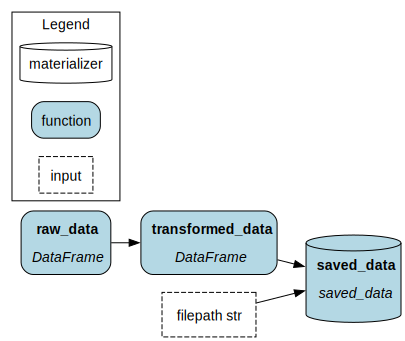

In [3]:
from hamilton_sdk import adapters

from hamilton import driver

tracker = adapters.HamiltonTracker(
    project_id=7,  # modify this as needed
    username="elijah@dagworks.io",
    dag_name="my_version_of_the_dag",
    tags={"environment": "DEV", "team": "MY_TEAM", "version": "X"},
)
dr = driver.Builder().with_config({}).with_modules(simple_etl).with_adapters(tracker).build()
dr.display_all_functions()

In [4]:
dr.execute(["saved_data"], inputs={"filepath": "data.csv"})


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/7/runs/25


Captured execution run. Results can be found at http://localhost:8241/dashboard/project/7/runs/25



{'saved_data': <hamilton.htypes.DataSaverMetadata at 0x1528de280>}